In [1]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline


# A complete round of error correction


*Author: Ilan Tzitrin*




In this tutorial we will go over the minimal steps required to run
through one round of quantum error correction: encoding, decoding, and
recovery. This will allow us to demonstrate most of the functionality of
FlamingPy.




The first step is to declare your choice of error-correcting code.
Currently, FlamingPy gives you the option to use the *surface code*
(also known as the *planar* or *toric* code, depending on its boundary
conditions). In the measurement-based picture, the surface code is
represented as a special graph state (see the `graph states tutorial <graph-states-tutorial>`)
called the RHG lattice. We begin by specifying some code parameters:




In [2]:
import matplotlib.pyplot as plt

from flamingpy.codes import SurfaceCode
from flamingpy.decoders import decoder as dec
from flamingpy.noise import IidNoise

# QEC code parameters
distance = 3
# Boundaries ("open", "toric" or "periodic")
boundaries = "open"
# Error complex ("primal" or "dual")
ec = "primal"

We will be discussing the properties of the code in more depth in
another tutorial, but let us summarize them for you:

-  The distance of the code will correspond to size of the
   RHG lattice. More fundamentally, it represents the length of the
   smallest logical operator: a logical $Z$ gate on the surface
   code, for example, will require a string of $d$ physical
   $Z$ gate on the qubits.

-  The ``boundaries`` option will determine the connectivity of the
   lattice at the boundary. In order to encode a single logical qubit,
   the boundaries must be set to ''open''; this is also the choice that is
   more easily realizable in hardware.

-  The error complex refers to the kind of error we would like to
   correct (analogous to correcting $X$ or $Z$ errors using
   the gate-based surface code). A full round of error correction
   involves correcting both primal and dual errors.

Having defined these parameters, we can now instantiate the code and
draw it with a simple command:




<Axes3DSubplot:xlabel='x', ylabel='z'>

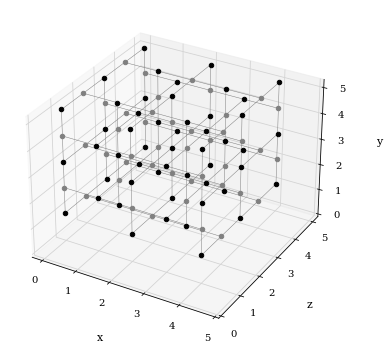

In [3]:
# Code and code lattice (cluster state)
RHG_code = SurfaceCode(distance=distance, ec=ec, boundaries=boundaries)
RHG_code.draw()

By default, the primal nodes are drawn black and dual nodes as grey.




Next, we have to add some noise to our ideal qubits. For this tutorial,
we opt for a simple Pauli noise model, where each qubit has some
independent probability of a phase (Pauli $Z$) error:




In [4]:
p_Z = 0.3
IidNoise(RHG_code, p_Z).apply_noise()

At this point, we seek help from the decoder to correct our noisy
lattice. The two decoders currently available in FlamingPy are
*minimum-weight perfect matching* (''MWPM'') and *Union-Find* (''UF'').
Although MWPM is slower, it is standard and well-performing; let us
select it:




The option ``"outer"`` here indicates that this is a qubit-level decoder
taking in bit values. One may also specify an ``"inner"`` decoder if the
qubits are, for example, GKP states, which are capable of performing an
additional round of error correction themselves. We will go over this in
more detail in another tutorial.




Finally, we can run the ``correct`` function from the ``decoder`` module, which decodes and recovers
the information. We can illustrate the full decoding procedure, for
which we first specify some drawing options:





Matching graph empty!

Success: False


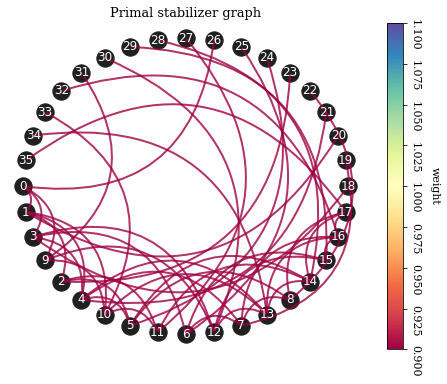

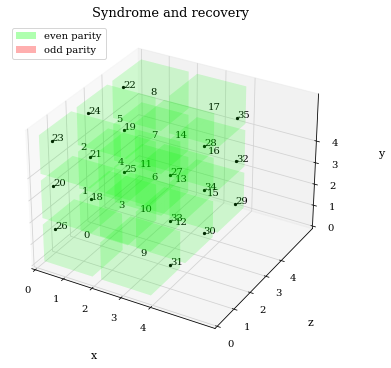

In [9]:
dw = {
    "show_nodes": False,
    "color_nodes": "k",
    "show_recovery": True,
    "label_stabilizers": True,
    "label_boundary": True,
    "label_edges": False,
    "label": None,
    "legend": True,
    "show_title": True,
    "show_axes": True,
}

c = dec.correct(
    code=RHG_code,
    decoder=None,
    draw=True,
    drawing_opts=dw,
)
print(f"Success: {c}")

Here's what we have drawn:

-  The *stabilizer graph*, a representation of the codes with
   information about the errors that have occurred.
-  The *matching graph*, the processed stabilizer graph that is fed into
   the decoder.
-  The *syndrome and recovery* plot, where we visualize where errors
   have ocurred (the red voxels) and the *matching* (lines connecting
   the voxels) that shows where the bit values must be flipped to
   recover the information.

You can go back and forth between these plots by comparing the indices
of the decoding graphs and those on the voxel plot. You may also display
the RHG lattice by setting ``"show_nodes"`` to ``True``.

More information about all these steps will come in future tutorials;
for now, you may visit our `introduction to error correction. <quantum-error-correction>`


